In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# Define control inputs
def control_input(t):
    wl = np.where((t >= 4) & (t <= 6), 12, np.where((t >= 6) & (t <= 8), 12, 1))
    wr = np.where(((t >= 0.5) & (t <= 1.5)) | ((t >= 2) & (t <= 4)), 12, 1)
    return wl, wr

In [ ]:
# Define differential equations
def f(x, y, theta, wl, wr):
    r = 0.1
    L = 1

    v = (wl + wr) * r / 2
    w = (wr - wl) * r / L

    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    theta_dot = w
    return x_dot, y_dot, theta_dot

In [ ]:
# Simulation parameters
dt = 0.1
T = 10

In [ ]:
# Initial conditions
x = 0
y = 0
theta = 1

In [ ]:
# Time array
t_data = np.arange(0, T + dt, dt)

In [ ]:
# Control inputs
wl, wr = control_input(t_data)

In [ ]:
# Initialize data storage
x_data = np.zeros(len(t_data))
y_data = np.zeros(len(t_data))
theta_data = np.zeros(len(t_data))

In [ ]:
# Euler's method loop
for i in range(len(t_data)):
    x_dot, y_dot, theta_dot = f(x, y, theta, wl[i], wr[i])
    x += x_dot * dt
    y += y_dot * dt
    theta += theta_dot * dt
    x_data[i] = x
    y_data[i] = y
    theta_data[i] = theta

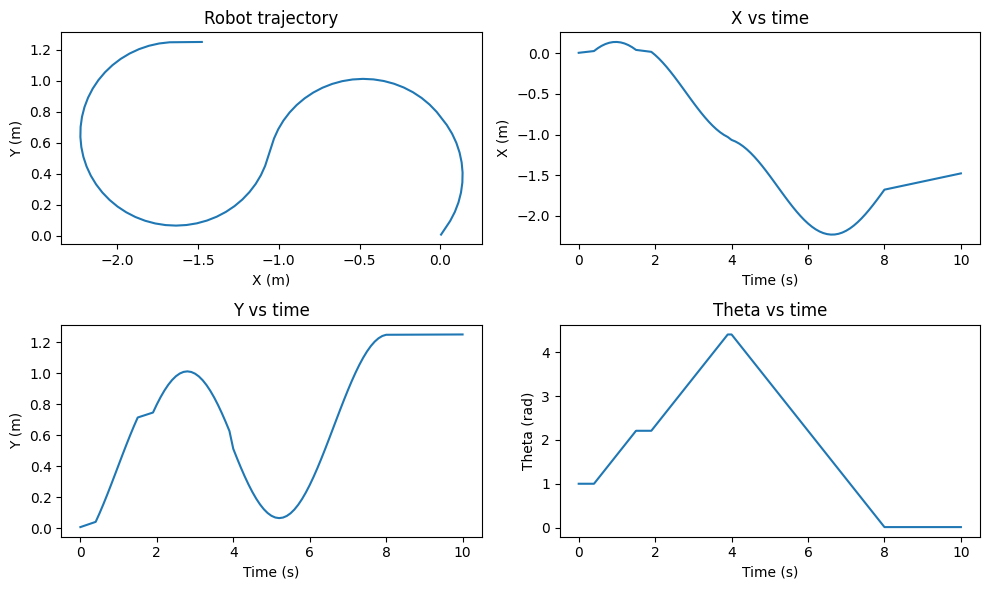

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(x_data, y_data)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Robot trajectory')

plt.subplot(2, 2, 2)
plt.plot(t_data, x_data)
plt.xlabel('Time (s)')
plt.ylabel('X (m)')
plt.title('X vs time')

plt.subplot(2, 2, 3)
plt.plot(t_data, y_data)
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')
plt.title('Y vs time')

plt.subplot(2, 2, 4)
plt.plot(t_data, theta_data)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs time')

plt.tight_layout()
plt.show()

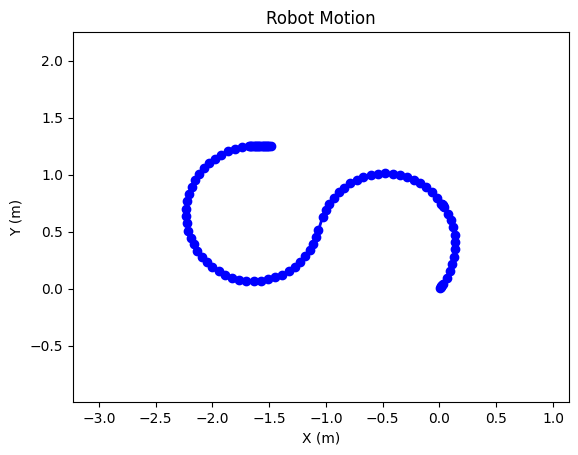

In [ ]:
# Animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'bo-', lw=2)

def init():
    ax.set_xlim(min(x_data) - 1, max(x_data) + 1)
    ax.set_ylim(min(y_data) - 1, max(y_data) + 1)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('Robot Motion')
    return line,

def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(t_data), init_func=init, blit=True)
ani.save('/content/drive/My Drive/robot_trajectory.mp4', fps=10)

plt.show()